In [97]:
#Чтение и обработка данных
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
# Загрузка данных из train.csv
train_data = pd.read_csv("train.csv", parse_dates=["timestamp"])

# Загрузка данных из macro.csv
macro_data = pd.read_csv("macro.csv", parse_dates=["timestamp"])

In [99]:
# Объединение данных из train_data и macro_data по столбцу timestamp
merged_data = pd.merge(train_data, macro_data, on="timestamp")

# Вывод первых нескольких строк объединенных данных для проверки
merged_data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


Количество столбцов до удаления: 391
Количество столбцов после удаления: 379


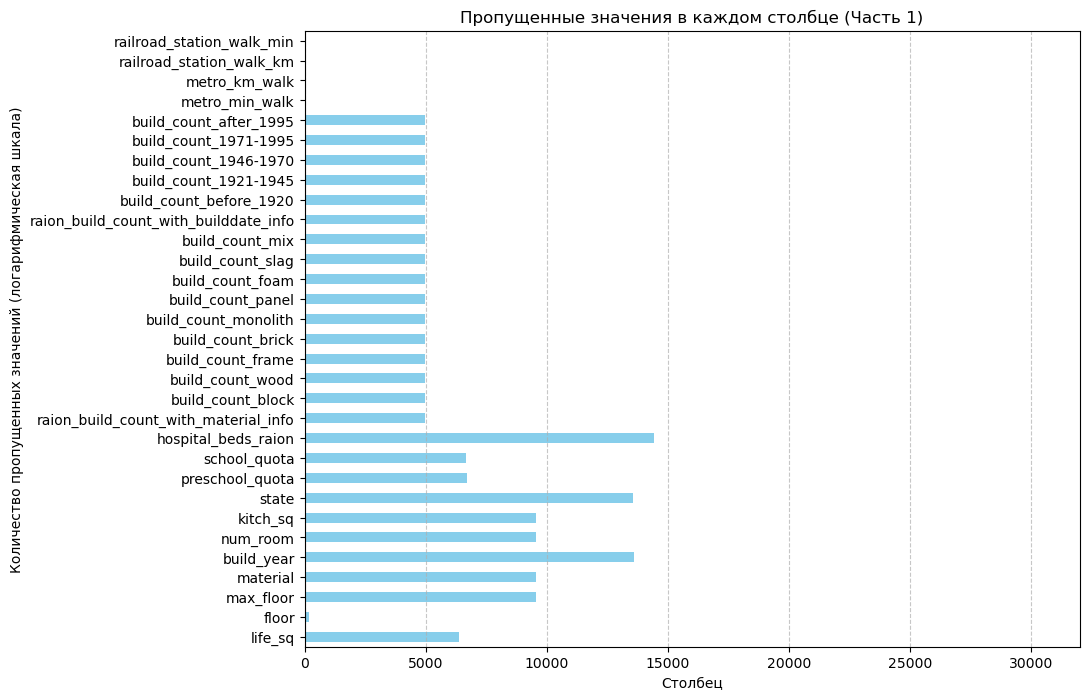

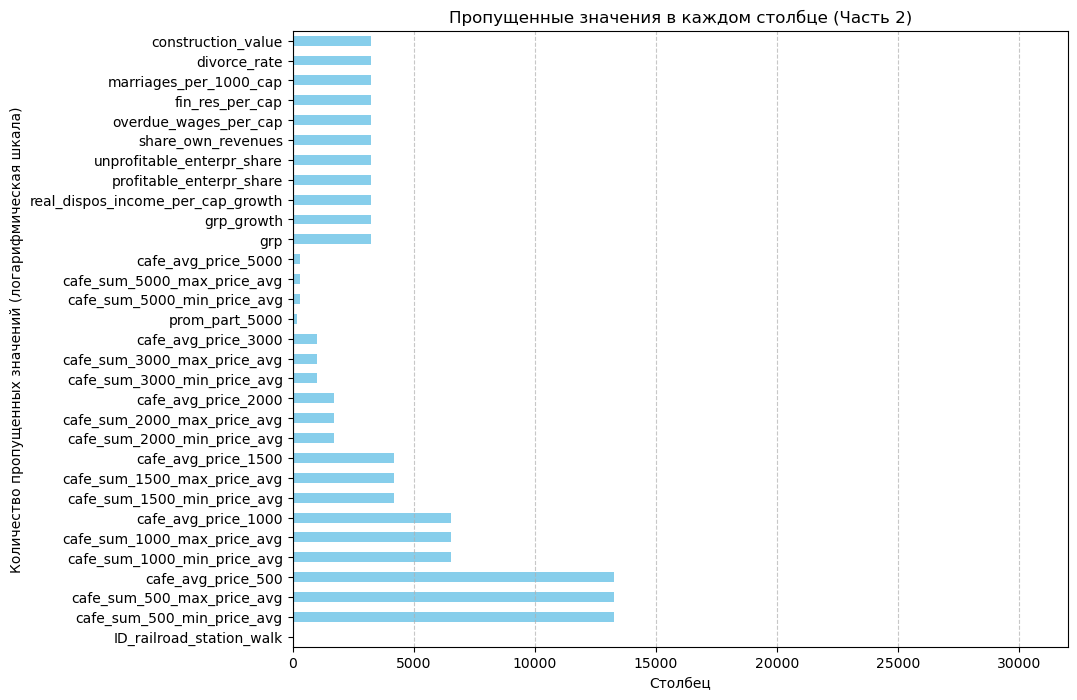

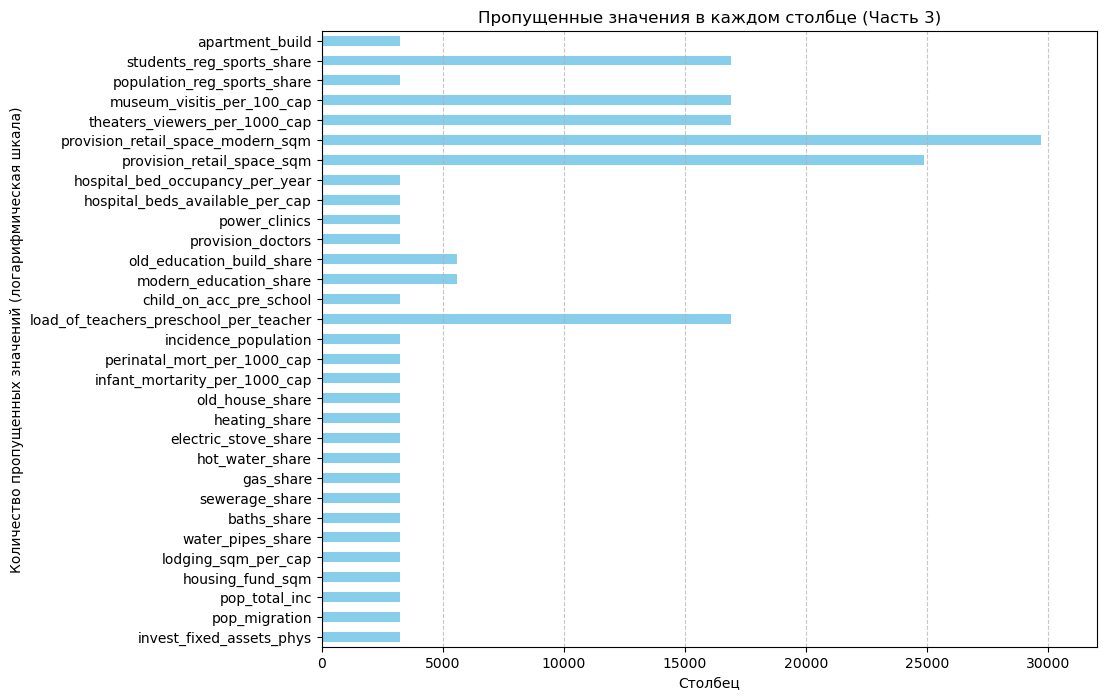

In [100]:
df = pd.DataFrame(merged_data)
num_columns_before_drop = df.shape[1]
print("Количество столбцов до удаления:", num_columns_before_drop)
# Подсчет пропущенных значений в каждом столбце
missing_values_count = df.isnull().sum()

# Отфильтровать столбцы с количеством пропущенных значений больше 10
missing_values_count_filtered = missing_values_count[missing_values_count > 10]


# Разделение на части (например, на две части)
num_slices = 3
slice_size = len(missing_values_count_filtered) // num_slices
if len(missing_values_count_filtered) % num_slices != 0:
    slice_size += 1

# Построение графиков
for i in range(num_slices):
    start_index = i * slice_size
    end_index = min((i + 1) * slice_size, len(missing_values_count_filtered))
    slice_missing_values_count = missing_values_count_filtered.iloc[start_index:end_index]
    
    plt.figure(figsize=(10, 8))
    slice_missing_values_count.plot(kind='barh', color='skyblue')
    plt.title('Пропущенные значения в каждом столбце (Часть {})'.format(i + 1))
    plt.xlabel('Столбец')
    plt.ylabel('Количество пропущенных значений (логарифмическая шкала)')
    plt.xlim([0, 32000])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout

columns_to_drop = missing_values_count[missing_values_count > 13000].index

# Удаление столбцов из DataFrame
df = df.drop(columns=columns_to_drop)
num_columns_after_drop = df.shape[1]
print("Количество столбцов после удаления:", num_columns_after_drop)

In [102]:
# Рассчитать матрицу корреляции
corr_matrix = df.corr().abs()
num_columns_before_drop = df.shape[1]
print("Количество столбцов до удаления:", num_columns_before_drop)
pd.set_option('display.max_rows', None)

# Выбрать столбцы с наибольшим количеством пропущенных значений из пар с высокой корреляцией
correlation_with_target = df.corr()['price_doc'].abs()
correlation_sorted = correlation_with_target.sort_values(ascending=False)
print(correlation_sorted)


# Выведем корреляцию, чтобы увидеть, какие столбцы имеют наибольшее влияние на целевую переменную


# Определение порога корреляции
threshold = 0.117  # Примерный порог корреляции

# Определение столбцов с корреляцией ниже порога
columns_to_drop = correlation_with_target[correlation_with_target < threshold].index

# Удаление столбцов из DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Вывод информации о удаленных столбцах
print("Удалены столбцы:", columns_to_drop)

# Вывести оставшиеся столбцы
remaining_columns = df.columns
print("Оставшиеся столбцы после удаления:")
print(remaining_columns)
num_columns_after_drop = df.shape[1]
print("Количество столбцов после удаления:", num_columns_after_drop)


/tmp/ipykernel_33016/835985801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


Количество столбцов до удаления: 180


/tmp/ipykernel_33016/835985801.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['price_doc'].abs()


id                                   0.121203
full_sq                              0.341840
life_sq                              0.165606
floor                                0.117447
num_room                             0.476337
area_m                               0.166981
raion_popul                          0.151587
children_preschool                   0.133957
preschool_education_centers_raion    0.159418
children_school                      0.138860
school_education_centers_raion       0.193636
healthcare_centers_raion             0.190006
university_top_20_raion              0.165827
sport_objects_raion                  0.252794
shopping_centers_raion               0.150825
office_raion                         0.145718
young_all                            0.136752
young_male                           0.135327
young_female                         0.137986
work_all                             0.142901
work_male                            0.145476
work_female                       